In [1]:
%store -r __imp

In [2]:
__imp

The libraries have been loaded!


In [85]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import wordcloud
import re

In [116]:
df_m = pd.read_csv('C:/Work/csv/texto_pregacoes.csv')

#df_m = df_m[df_m.pregador == 'martinez']

df_m = df_m[df_m.confianca > 0.82]
re_n_letras = re.compile('\d+')
df_m['fala'] = df_m['fala'].apply(lambda x: re_n_letras.sub(r'',x).lower())

In [117]:
stopwords = set(list(nltk.corpus.stopwords.words('portuguese') ) + ['tá','lá','tô','aí','alguma','rua','munhoz','menezes','burro','pantera','zona','ainda','assim','é','antes','porque','pois','pra','né'])
tokenizer = TreebankWordTokenizer()
df_m['palavras'] = df_m.fala.apply(lambda frase:[p for p in tokenizer.tokenize(frase.strip()) if p not in stopwords])

pregador
alaecio           1
arquimedes        2
claudiomarcola    3
joaquim           1
josesebastiao     1
luispassioni      1
marciel           2
martinez          8
messias           1
rivelli           1
valmir            1
Name: arq_ogm, dtype: int64


c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


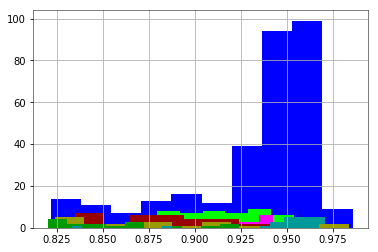

In [118]:
print(df_m.groupby('pregador').nunique()['arq_ogm'])
for p in df_m.pregador.unique():
    df_m[df_m.pregador == p]['confianca'].hist()

In [119]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def monta_wc(palavras_wc,vai_salvar=False):
    mask = np.array(Image.open(path.join('C:\\Work', "1280px-Open_bible_01_01.png")))
    wc = WordCloud(max_words=1000, mask=mask, margin=10,
                   random_state=1).generate(str(palavras_wc))
    default_colors = wc.to_array()
    plt.figure(figsize=(10,10))
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
               interpolation="bilinear")
    if vai_salvar:
        wc.to_file("wordcloud_pregacoes.png")
    plt.axis("off")


c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


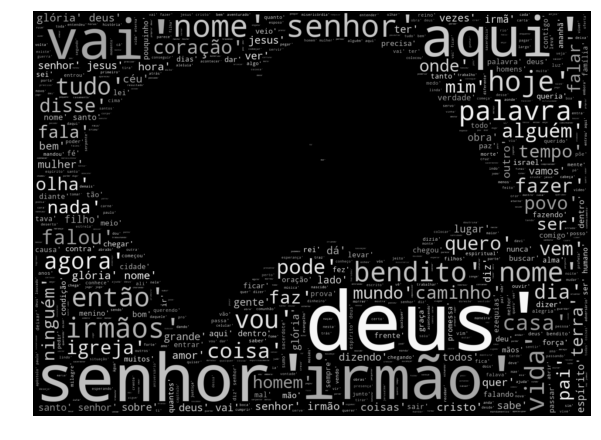

In [109]:
import itertools
monta_wc(list(itertools.chain(*df_m.palavras.values)))

## O maior número é do Martinez então iremos dissecá-las e grande taxa de confiaça

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


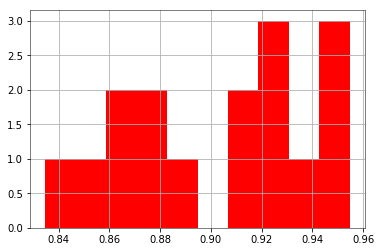

In [150]:
df_estudo = df_m[df_m.pregador=='valmir']
df_estudo.confianca.hist()

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


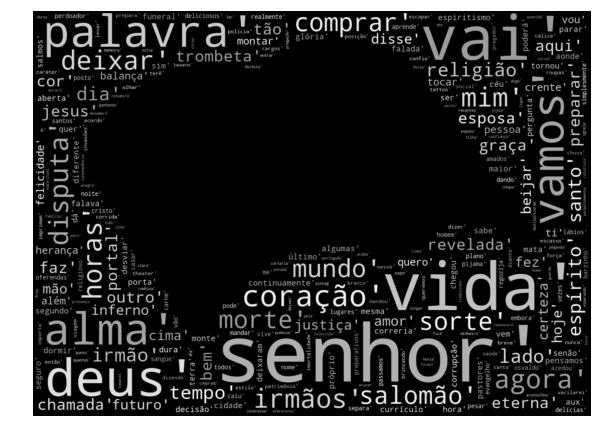

In [151]:
monta_wc(list(itertools.chain(*df_estudo.palavras.values)))

In [152]:
df_estudo['qtd_palavras'] = df_estudo.palavras.apply(len)
df_estudo.head()
sum(df_estudo.qtd_palavras)/df_estudo.shape[0]
#df_estudo.iloc[39]
#print(df_estudo.iloc[39]['fala'])
#print(df_estudo.iloc[40]['fala'])

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,confianca,fala,pregador,arq_ogm,palavras,qtd_palavras
79,0.954702,vamos vamos ler a palavra revelada pelo espíri...,valmir,1_4967837943700914212_valmir.wav,"[vamos, vamos, ler, palavra, revelada, espírit...",37
80,0.946340,pastores se multiplicaram aqueles que faz ofer...,valmir,1_4967837943700914212_valmir.wav,"[pastores, multiplicaram, faz, oferendas, outr...",45
81,0.933214,eu quero beijar com pinceg avenida da vida na ...,valmir,1_4967837943700914212_valmir.wav,"[quero, beijar, pinceg, avenida, vida, presenç...",40
82,0.930606,sim poderá entrar na cidade se a felicidade do...,valmir,1_4967837943700914212_valmir.wav,"[sim, poderá, entrar, cidade, felicidade, cren...",9
83,0.928170,aonde a disputa por cargos disputa por dinhei...,valmir,1_4967837943700914212_valmir.wav,"[aonde, disputa, cargos, disputa, dinheiro, di...",36


23.25

In [153]:
palavras_estudo = []
QTD_PALAVRAS_AGRUPADAS = 12
for a in df_estudo.arq_ogm.unique():
    palavras_pregacao = list(itertools.chain(*df_estudo[df_estudo.arq_ogm==a].palavras.values))
    
    palavras_estudo.extend([palavras_pregacao[x:x+QTD_PALAVRAS_AGRUPADAS] for x in range(0, len(palavras_pregacao), QTD_PALAVRAS_AGRUPADAS)])

In [154]:
#montando as combinacoes de palavras
from sklearn import preprocessing
import networkx as nx

#Combinando todas as palavras de cada verso duas a duas
arestas = []
nos = []
for ps in palavras_estudo:
    arestas.extend(itertools.combinations(sorted(ps),2))
    nos.extend(itertools.chain(ps))

print(nos[:5])
nos = list(set(nos))
g_ex = nx.Graph()
g_ex.add_nodes_from(nos)
df_arestas = pd.DataFrame(arestas,columns=['p1','p2']).reset_index().groupby(['p1','p2']).count()
df_arestas.columns = ['qtd']
df_arestas.sort_values('qtd',ascending=False).head(20)

g_ex.add_weighted_edges_from(df_arestas.reset_index().itertuples(index=False,name=None))


['vamos', 'vamos', 'ler', 'palavra', 'revelada']


qtd
p1      p2           
horas   vida        9
disputa salomão     6
futuro  montar      4
balança lado        4
fez     vai         4
senhor  sorte       4
palavra tão         4
comprar cortaria    3
        decisão     3
palavra revelada    3
irmão   vida        3
chamada horas       3
palavra senhor      3
comprar comprar     3
        morte       3
        espírito    3
boca    comprar     3
comprar pregador    3
senhor  ti          3
comprar prepara     3

In [155]:
todas_palavras = list(itertools.chain.from_iterable(palavras_estudo))
print('%i palavras diferentes.' %len(list(set(todas_palavras))))
print('%i palavras.' %len(todas_palavras))
print('Razão %.2f' %(len(todas_palavras)/len(list(set(todas_palavras)))))

df_p = pd.DataFrame(todas_palavras,columns=['palavra'])
c = df_p.reset_index().groupby('palavra').count().sort_values('index')
c.columns = ['contador']
c['pc'] = c.contador*100/sum(c.contador)
c.sort_values('contador',ascending=False).head(50)


266 palavras diferentes.
372 palavras.
Razão 1.40


,contador,pc
palavra,,
senhor,8,2.150538
vida,7,1.881720
vai,6,1.612903
alma,4,1.075269
palavra,4,1.075269
deus,4,1.075269
vamos,4,1.075269
coração,4,1.075269
morte,3,0.806452


In [133]:
nx.algorithms.centrality.closeness_centrality(g_ex,u ='jesus')

0.5344236760124611